In [1]:
import pandas as pd

# 单级索引

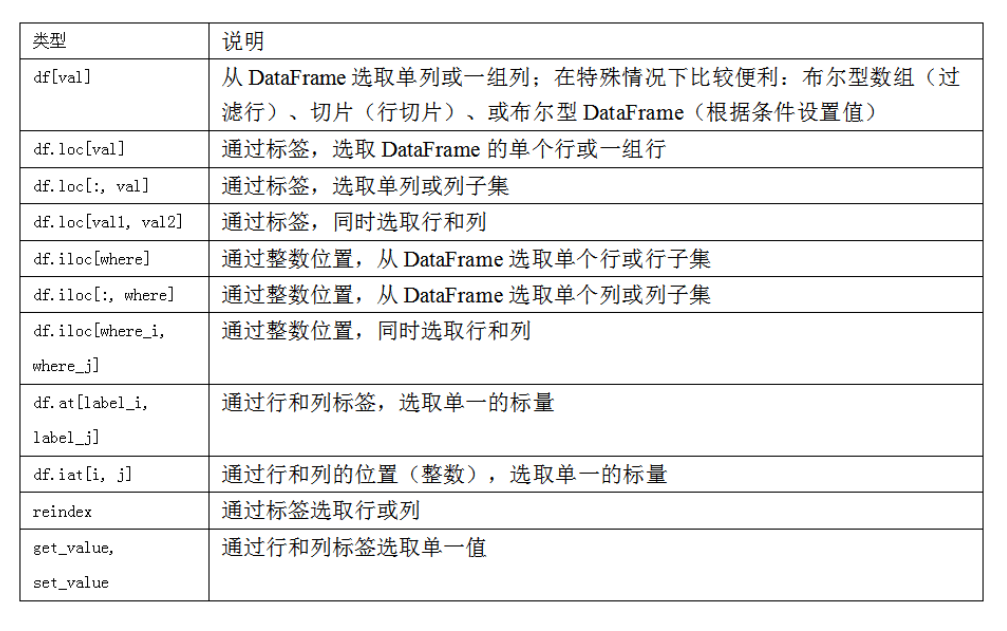

## Series的索引

类似于NumPy数组的索引，只不过Series的索引值不只是整数

In [55]:
obj = pd.Series(data=np.arange(4.), index=list("abcd"))
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [44]:
# 使用索引名
obj["c"]

2.0

In [45]:
# 数字索引
obj[1]

1.0

In [46]:
# 数字切片--不包含末尾
obj[1:4]

b    1.0
c    2.0
d    3.0
dtype: float64

In [51]:
# 标签切片-包含末尾
obj["a":"c"]

a    0.0
b    1.0
c    2.0
dtype: float64

In [56]:
# 切片修改
obj["a":"c"] = 999
obj

a    999.0
b    999.0
c    999.0
d      3.0
dtype: float64

In [47]:
# 同时取多个
obj[["a","d"]]

a    0.0
d    3.0
dtype: float64

In [48]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

In [57]:
# 同时取多个并修改
obj["a","c"] = 888
obj

a    888.0
b    999.0
c    888.0
d      3.0
dtype: float64

In [50]:
# 布尔
obj[obj>2]

d    3.0
dtype: float64

## DataFrame的索引

In [58]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [59]:
# 切片--默认对行进行切片
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


### 索引查询--用loc和iloc进行选取

In [60]:
# 指定行和列标签
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [62]:
# 指定行和列数
data.iloc[1, [1,2]]

two      5
three    6
Name: Colorado, dtype: int32

In [63]:
# 可以分别对行和列使用切片
data.loc['Colorado':, :"two"]

,one,two
Colorado,4,5
Utah,8,9
New York,12,13


In [64]:
# 再加上布尔索引
data.loc['Colorado':, :"two"][data.one>5]

C:\Users\17761\AppData\Local\Temp\ipykernel_23020\930114844.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.loc['Colorado':, :"two"][data.one>5]


,one,two
Utah,8,9
New York,12,13


## 索引查询

如果轴索引含有整数，数据选取总会使用标签。为了更准确，请使用loc（标签）或iloc（整数）

In [4]:
ser = pd.Series(np.arange(3.), index=[1,2,3])
ser

1    0.0
2    1.0
3    2.0
dtype: float64

In [5]:
# 使用下列引用容易引起歧义
ser[1]# 究竟是第2（从0开始）个物理位置的索引or索引名为整数1的索引？

0.0

In [6]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2

a    0.0
b    1.0
c    2.0
dtype: float64

In [7]:
# 对于非整数索引，不会产生歧义
ser2["a"]

0.0

为了更准确，请使用loc（标签）或iloc（整数）

In [8]:
ser = pd.Series(np.arange(3.), index=[1,2,3])
ser

1    0.0
2    1.0
3    2.0
dtype: float64

In [10]:
# 由于loc代表的是对标签进行索引，索引这里不会引起歧义
ser.loc[1]# 索引名为整数1的索引

0.0

In [11]:
# 由于loc代表的是对整数进行索引
ser.iloc[1]# 所以第2（从0开始）个物理位置的索引

1.0

## 设置索引

In [3]:
# 构造一个新表
df = pd.DataFrame({"A":list("aacd"), "B":list("PQRT"), "C":[1,2,3,4]})
df

,A,B,C
0,a,P,1
1,a,Q,2
2,c,R,3
3,d,T,4


In [5]:
# 索引是index对象
index = df.index
index

RangeIndex(start=0, stop=4, step=1)

Index对象是不可变的，因此用户不能对其进行修改

In [8]:
try:
    index[0] = 99
except Exception as e:
    print(e)

Index does not support mutable operations


不可变可以使Index对象在多个数据结构之间安全共享

In [14]:
my_index = pd.Index(np.arange(5,9))
my_index

Int64Index([5, 6, 7, 8], dtype='int64')

In [15]:
# 构造一个新表,传入index
df = pd.DataFrame({"A":list("aacd"), "B":list("PQRT"), "C":[1,2,3,4]}, index=my_index)
df

,A,B,C
5,a,P,1
6,a,Q,2
7,c,R,3
8,d,T,4


In [17]:
df.index is my_index

True

In [18]:
# 判断索引中所包含的元素
"A" in df.columns

True

可以包含重复的标签

In [20]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
df = pd.DataFrame({"A":list("aacd"), "B":list("PQRT"), "C":[1,2,3,4]}, dup_labels)
df

,A,B,C
foo,a,P,1
foo,a,Q,2
bar,c,R,3
bar,d,T,4


选择重复的标签，会显示所有的结果

In [21]:
# 使用loc取行索引
df.loc["foo"]

,A,B,C
foo,a,P,1
foo,a,Q,2


索引的方法和属性

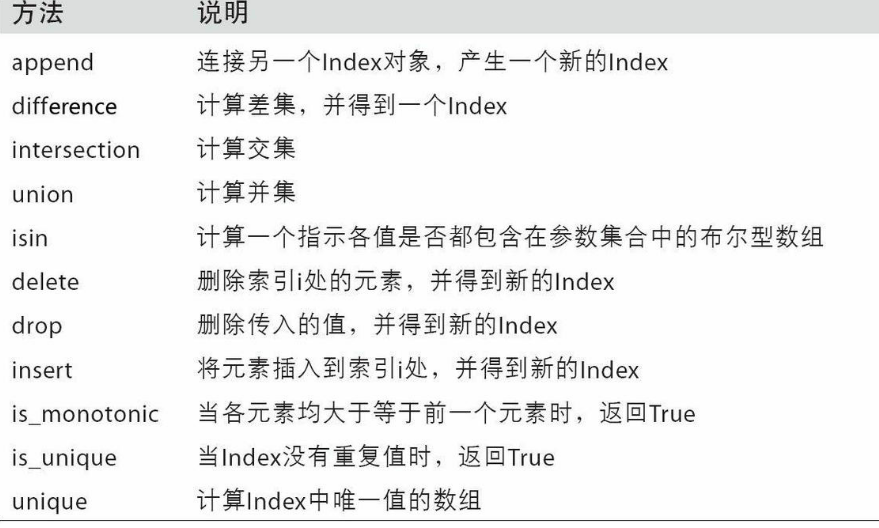

### set_index

索引的设置可以使用`set_index`完成，这里的主要参数是`append`，表示是否来保留原来的索引，直接把新设定的添加到原索引的内层

In [45]:
df.set_index("A")# 可以卡到A这一列变粗了

,B,C
A,,
a,P,1
a,Q,2
c,R,3
d,T,4


In [46]:
# 保留原本的索引为外层索引，新增加的索引作为内层索引
df.set_index("A", append=True)

,,B,C
,A,,
0,a,P,1
1,a,Q,2
2,c,R,3
3,d,T,4


In [47]:
# 使用列表同时指定多个列为索引
df.set_index(["A","B"])

C
A B   
a P  1
  Q  2
c R  3
d T  4


如果想要添加索引的列没有出现在其中，那么可以直接在参数中传入相应的`Series`

In [49]:
my_index = pd.Series(list("WXYZ"), name="D")
# 设置原本的列A和新列my_index为索引
df_new = df.set_index(["A", my_index])
df_new

B  C
A D      
a W  P  1
  X  Q  2
c Y  R  3
d Z  T  4

### reset_index

`reset_index`是`set_index`的逆函数，其主要参数是`drop`，表示是否要把去掉的索引层丢弃，而不是添加到列中

In [50]:
# 第D列不再为索引
df_new.reset_index(["D"])

,D,B,C
A,,,
a,W,P,1
a,X,Q,2
c,Y,R,3
d,Z,T,4


In [51]:
# 第D列不再为索引且被丢弃
df_new.reset_index(["D"], drop=True)

,B,C
A,,
a,P,1
a,Q,2
c,R,3
d,T,4


重置所有的索引，pandas会直接重新生成一个默认索引

In [52]:
df_new.reset_index()

,A,D,B,C
0,a,W,P,1
1,a,X,Q,2
2,c,Y,R,3
3,d,Z,T,4


## reindex索引变形

reindex,reindex_like

reindex将会根据新索引进行重排。如果某个索引值当前不存在，就引入缺失值

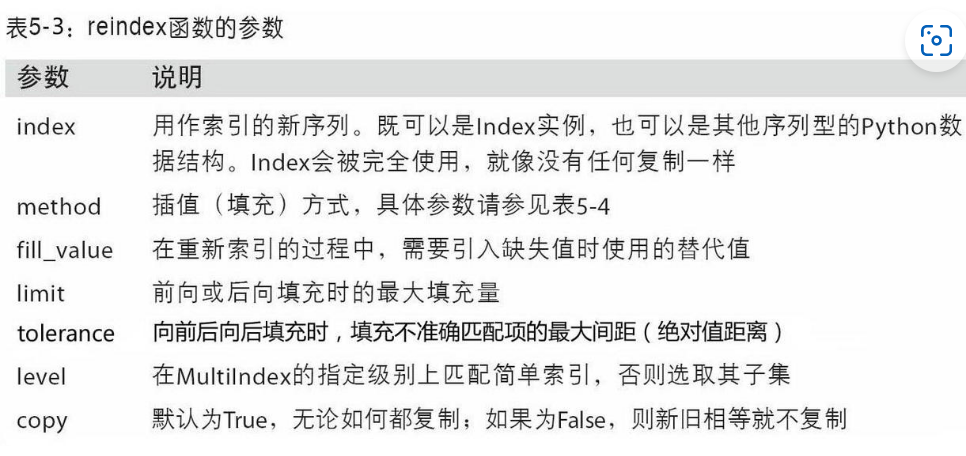

In [53]:
df_reindex = pd.DataFrame({"Weight":[60,70,80], "Height":[176,180,179]}, index=['1001','1003','1002'])
df_reindex

,Weight,Height
1001,60,176
1003,70,180
1002,80,179


In [54]:
df_reindex.reindex(index=['1001','1002','1003','1004'], columns=['Weight','Gender'])

,Weight,Gender
1001,60.0,NaN
1002,80.0,NaN
1003,70.0,NaN
1004,NaN,NaN


reindex_like:仿照传入的表索引来进行被调用表索引的变形

In [55]:
df_new = pd.DataFrame(index=['1001','1002','1003','1004'],columns=['Weight','Gender'] )
df_reindex.reindex_like(df_new)

,Weight,Gender
1001,60.0,NaN
1002,80.0,NaN
1003,70.0,NaN
1004,NaN,NaN


In [22]:
obj = pd.Series(["blue", "purple", "yellow"], index=[0,2,4])
obj

0      blue
2    purple
4    yellow
dtype: object

In [23]:
# 不填充，缺失数据使用NaN
obj.reindex(range(6))

0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

对于时间序列这样的有序数据，重新索引时可能需要做一些插值处理。method选项即可达到此目的，例如，使用ffill可以实现前向值填充

In [25]:
# 使用mathod进行填充
obj.reindex(range(6), method="ffill")

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

DataFrame默认修改行索引

In [26]:
df = pd.DataFrame(data=np.arange(9).reshape(3,3), index=list("acd"), columns=["Ohio","Texas","California"])
df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [27]:
# DataFrame默认修改行索引
df.reindex(list("abcd"))

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [29]:
# 列可以用columns关键字重新索引
df.reindex(columns=['Texas', 'Utah', 'California'])

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


# 索引删除

## drop-单级索引删除

In [30]:
obj = pd.Series(np.arange(5.), index=list("abcde"))
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

Series :使用drop方法删除指定行

In [32]:
# 删除单行
new_obj = obj.drop("c")
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [33]:
# 删除多行
new_obj = obj.drop(["c","d"])
new_obj

a    0.0
b    1.0
e    4.0
dtype: float64

DataFrame: 默认删除行（axis 0）,通过传递axis=1或axis=’columns’可以删除列的值

In [36]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [37]:
# 默认删除行（axis 0）
new_data = data.drop(["Utah"])
new_data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,12,13,14,15


In [38]:
# 与下列等价
new_data = data.drop(["Utah"], axis=0)
new_data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,12,13,14,15


In [39]:
# 通过传递axis=1或axis=’columns’可以删除列的值
new_data = data.drop("two", axis=1)
new_data

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [40]:
new_data = data.drop(["four", "two"], axis="columns")
new_data

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


使用inplace参数实现就地修改

In [41]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [42]:
data.drop("Utah", inplace=True)
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,12,13,14,15


In [15]:
df_ex.droplevel([0,1], axis=0)

Big     C               D            
Small   c       d       c       d    
Other cat dog cat dog cat dog cat dog
Extra                                
alpha  -5  -9   3  -1   8  -1   5   2
beta    0   0   8  -4  -1  -5   5   6
alpha  -9  -9   2  -8   6  -9   1  -1
beta    0  -4  -5  -4   9  -9  -5   3
alpha   8  -6  -7   6   6   9   1   7
beta   -6  -3  -1  -2  -9  -6   6  -4
alpha   2   0   1  -5  -6   2  -3  -7
beta   -6  -2   8   3  -3   7  -1  -7

## query方法

把字符串形式的查询表达式传入query方法来查询数据

在query表达式中，帮用户注册了所有来自DataFrame的列名，所有属于该Series的方法都可以被调用，和正常的函数调用并没有区别



In [3]:
df = pd.read_csv("data/learn_pandas.csv", usecols=['School', 'Grade', 'Name', 'Gender', 'Weight', 'Transfer'])
df.head()


,School,Grade,Name,Gender,Weight,Transfer
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,46.0,N
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
3,Fudan University,Sophomore,Xiaojuan Sun,Female,41.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N


In [4]:
# 之前使用loc进行的复杂索引
df[(df.School == "Peking University") & (df.Grade == "Freshman" )]

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
32,Peking University,Freshman,Gaopeng Shi,Female,48.0,N
35,Peking University,Freshman,Gaoli Zhao,Male,78.0,N
36,Peking University,Freshman,Xiaojuan Qin,Male,79.0,Y
38,Peking University,Freshman,Qiang Han,Male,87.0,N
45,Peking University,Freshman,Quan Chu,Female,43.0,N
54,Peking University,Freshman,Xiaojuan Chu,Male,58.0,Y
57,Peking University,Freshman,Changquan Chu,Female,45.0,N
88,Peking University,Freshman,Xiaopeng Han,Female,53.0,N
96,Peking University,Freshman,Changmei Feng,Female,56.0,N


In [6]:
# loc传入函数
def cond(x):
    condition1 = x.School == "Peking University"
    condition2 = x.Grade == "Freshman"
    res = condition1 & condition2
    return res

df.loc[cond]


,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
32,Peking University,Freshman,Gaopeng Shi,Female,48.0,N
35,Peking University,Freshman,Gaoli Zhao,Male,78.0,N
36,Peking University,Freshman,Xiaojuan Qin,Male,79.0,Y
38,Peking University,Freshman,Qiang Han,Male,87.0,N
45,Peking University,Freshman,Quan Chu,Female,43.0,N
54,Peking University,Freshman,Xiaojuan Chu,Male,58.0,Y
57,Peking University,Freshman,Changquan Chu,Female,45.0,N
88,Peking University,Freshman,Xiaopeng Han,Female,53.0,N
96,Peking University,Freshman,Changmei Feng,Female,56.0,N


现在使用query:把字符串形式的查询表达式传入query方法来查询数据

In [7]:
df.query("(School == 'Peking University')&"
         "(Grade == 'Freshman')")

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
32,Peking University,Freshman,Gaopeng Shi,Female,48.0,N
35,Peking University,Freshman,Gaoli Zhao,Male,78.0,N
36,Peking University,Freshman,Xiaojuan Qin,Male,79.0,Y
38,Peking University,Freshman,Qiang Han,Male,87.0,N
45,Peking University,Freshman,Quan Chu,Female,43.0,N
54,Peking University,Freshman,Xiaojuan Chu,Male,58.0,Y
57,Peking University,Freshman,Changquan Chu,Female,45.0,N
88,Peking University,Freshman,Xiaopeng Han,Female,53.0,N
96,Peking University,Freshman,Changmei Feng,Female,56.0,N


In [8]:
# 在query表达式中，帮用户注册了所有来自DataFrame的列名，所有属于该Series的方法都可以被调用，和正常的函数调用并没有区别
df.query("Weight > Weight.mean()").head()

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N
10,Shanghai Jiao Tong University,Freshman,Xiaopeng Zhou,Male,74.0,N
14,Tsinghua University,Senior,Xiaomei Zhou,Female,57.0,N


对于含有空格的列名，需要使用`` `col name` ``的方式进行引用。

同时，在`query`中还注册了若干英语的字面用法，帮助提高可读性，例如：`or, and, or, in, not in`。

In [10]:
df.query("(Grade not in ['Freshman','Sophomore']) and (Gender=='Male')").head()

,School,Grade,Name,Gender,Weight,Transfer
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
16,Tsinghua University,Junior,Xiaoqiang Qin,Male,68.0,N
17,Tsinghua University,Junior,Peng Wang,Male,65.0,N
18,Tsinghua University,Senior,Xiaofeng Sun,Male,71.0,N
21,Shanghai Jiao Tong University,Senior,Xiaopeng Shen,Male,62.0,NaN


此外，在字符串中出现与列表的比较时，`==`和`!=`分别表示元素出现在列表和没有出现在列表，等价于`in`和`not in`

In [11]:
# 查询所有大三和大四的学生
df.query("Grade == ['Junior', 'Senior']").head()

,School,Grade,Name,Gender,Weight,Transfer
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,89.0,N
7,Tsinghua University,Junior,Gaoqiang Qian,Female,50.0,N
9,Peking University,Junior,Juan Xu,Female,NaN,N
11,Tsinghua University,Junior,Xiaoquan Lv,Female,43.0,N
12,Shanghai Jiao Tong University,Senior,Peng You,Female,48.0,NaN


对于`query`中的字符串，如果要引用外部变量，只需在变量名前加`@`符号

In [12]:
# 取出体重位于70kg到80kg之间的学生
low, high = 70, 80
df.query('(Weight >= @low) & (Weight <= @high)').head()

,School,Grade,Name,Gender,Weight,Transfer
1,Peking University,Freshman,Changqiang You,Male,70.0,N
4,Fudan University,Sophomore,Gaojuan You,Male,74.0,N
10,Shanghai Jiao Tong University,Freshman,Xiaopeng Zhou,Male,74.0,N
18,Tsinghua University,Senior,Xiaofeng Sun,Male,71.0,N
35,Peking University,Freshman,Gaoli Zhao,Male,78.0,N


# 多级索引

In [14]:
# 构造一张表
import numpy as np
np.random.seed(0)
multi_index = pd.MultiIndex.from_product([list('ABCD'), df.Gender.unique()], names=('School', 'Gender'))
multi_column = pd.MultiIndex.from_product([['Height', 'Weight'], df.Grade.unique()], names=('Indicator', 'Grade'))
df_multi = pd.DataFrame(np.c_[(np.random.randn(8,4)*5 + 163).tolist(), (np.random.randn(8,4)*5 + 65).tolist()],
                        index = multi_index, columns = multi_column).round(1)
df_multi

Indicator       Height                           Weight                   \
Grade         Freshman Senior Sophomore Junior Freshman Senior Sophomore   
School Gender                                                              
A      Female    171.8  165.0     167.9  174.2     60.6   55.1      63.3   
       Male      172.3  158.1     167.8  162.2     71.2   71.0      63.1   
B      Female    162.5  165.1     163.7  170.3     59.8   57.9      56.5   
       Male      166.8  163.6     165.2  164.7     62.5   62.8      58.7   
C      Female    170.5  162.0     164.6  158.7     56.9   63.9      60.5   
       Male      150.2  166.3     167.3  159.3     62.4   59.1      64.9   
D      Female    174.3  155.7     163.2  162.1     65.3   66.5      61.8   
       Male      170.7  170.3     163.8  164.9     61.6   63.2      60.9   

Indicator             
Grade         Junior  
School Gender         
A      Female   65.8  
       Male     63.5  
B      Female   74.8  
       Male     68.9  
C      Female   66.9  
       Male     67.1  
D      Female   63.2  
       Male     56.4

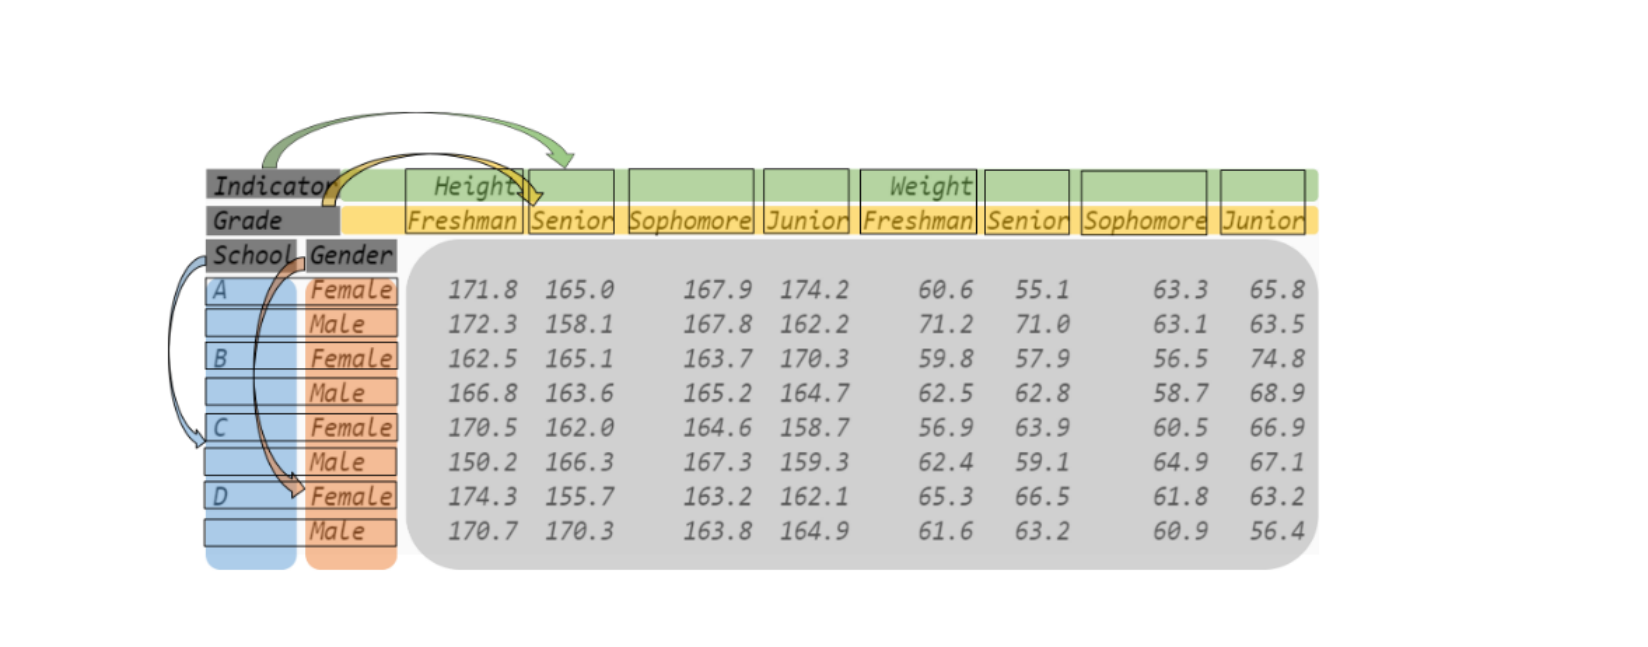

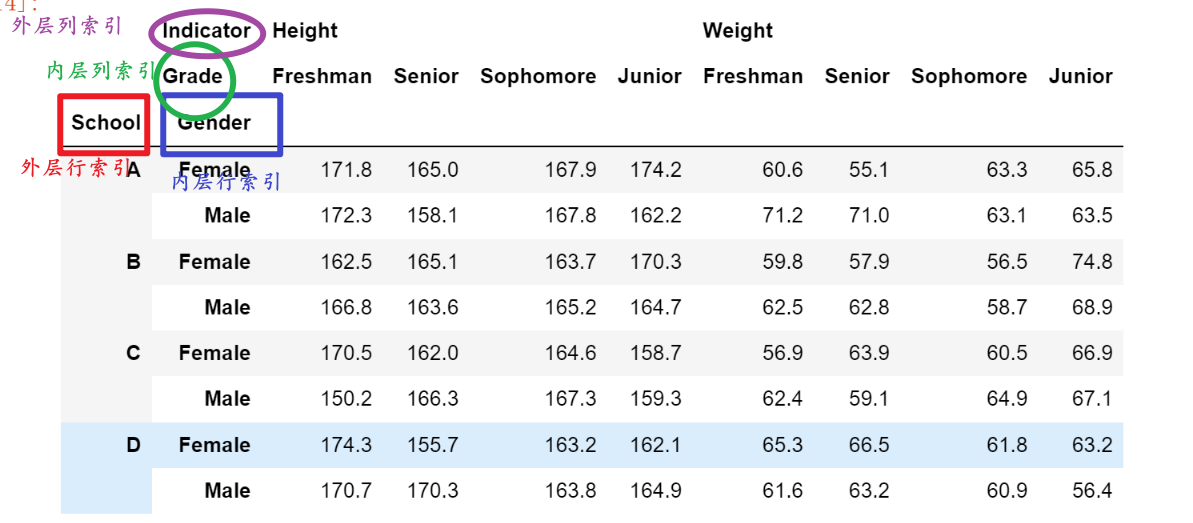

这里的行索引和列索引都是`MultiIndex`类型，只不过**索引中的一个元素是元组**而不是单层索引中的标量。例如，行索引的第四个元素为`("B", "Male")`，列索引的第二个元素为`("Height", "Senior")`

In [15]:
df_multi.index

MultiIndex([('A', 'Female'),
            ('A',   'Male'),
            ('B', 'Female'),
            ('B',   'Male'),
            ('C', 'Female'),
            ('C',   'Male'),
            ('D', 'Female'),
            ('D',   'Male')],
           names=['School', 'Gender'])

In [16]:
df_multi.columns

MultiIndex([('Height',  'Freshman'),
            ('Height',    'Senior'),
            ('Height', 'Sophomore'),
            ('Height',    'Junior'),
            ('Weight',  'Freshman'),
            ('Weight',    'Senior'),
            ('Weight', 'Sophomore'),
            ('Weight',    'Junior')],
           names=['Indicator', 'Grade'])

索引的名字和值属性分别可以通过`names`和`values`获得

In [19]:
df_multi.index.names,df_multi.columns.names

(FrozenList(['School', 'Gender']), FrozenList(['Indicator', 'Grade']))

In [20]:
df_multi.index.values, df_multi.columns.values

(array([('A', 'Female'), ('A', 'Male'), ('B', 'Female'), ('B', 'Male'),
        ('C', 'Female'), ('C', 'Male'), ('D', 'Female'), ('D', 'Male')],
       dtype=object),
 array([('Height', 'Freshman'), ('Height', 'Senior'),
        ('Height', 'Sophomore'), ('Height', 'Junior'),
        ('Weight', 'Freshman'), ('Weight', 'Senior'),
        ('Weight', 'Sophomore'), ('Weight', 'Junior')], dtype=object))

如果想要得到某一层的索引，则需要通过`get_level_values`获得

In [23]:
df_multi.index.get_level_values(0) # 0-外层行索引

Index(['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'], dtype='object', name='School')

## 多级索引的构造

使用set_index

from_tuples, from_arrays, from_product三种方法，它们都是pd.MultiIndex对象下的函数。

In [24]:
df = pd.read_csv("data/learn_pandas.csv")
df.head()


,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N,2,2019/11/6,0:05:22


### 使用set_index

In [25]:
# 设置行索引,此时的School和Grade都加粗了
df_multi = df.set_index(["School", "Grade"])
df_multi.head()

Name  Gender  Height  \
School                        Grade                                       
Shanghai Jiao Tong University Freshman     Gaopeng Yang  Female   158.9   
Peking University             Freshman   Changqiang You    Male   166.5   
Shanghai Jiao Tong University Senior            Mei Sun    Male   188.9   
Fudan University              Sophomore    Xiaojuan Sun  Female     NaN   
                              Sophomore     Gaojuan You    Male   174.0   

                                         Weight Transfer  Test_Number  \
School                        Grade                                     
Shanghai Jiao Tong University Freshman     46.0        N            1   
Peking University             Freshman     70.0        N            1   
Shanghai Jiao Tong University Senior       89.0        N            2   
Fudan University              Sophomore    41.0        N            2   
                              Sophomore    74.0        N            2   

                                         Test_Date Time_Record  
School                        Grade                             
Shanghai Jiao Tong University Freshman   2019/10/5     0:04:34  
Peking University             Freshman    2019/9/4     0:04:20  
Shanghai Jiao Tong University Senior     2019/9/12     0:05:22  
Fudan University              Sophomore   2020/1/3     0:04:08  
                              Sophomore  2019/11/6     0:05:22

In [26]:
df_multi.index.names

FrozenList(['School', 'Grade'])

In [27]:
df_multi.index.values

array([('Shanghai Jiao Tong University', 'Freshman'),
       ('Peking University', 'Freshman'),
       ('Shanghai Jiao Tong University', 'Senior'),
       ('Fudan University', 'Sophomore'),
       ('Fudan University', 'Sophomore'),
       ('Tsinghua University', 'Freshman'),
       ('Shanghai Jiao Tong University', 'Freshman'),
       ('Tsinghua University', 'Junior'),
       ('Tsinghua University', 'Freshman'),
       ('Peking University', 'Junior'),
       ('Shanghai Jiao Tong University', 'Freshman'),
       ('Tsinghua University', 'Junior'),
       ('Shanghai Jiao Tong University', 'Senior'),
       ('Shanghai Jiao Tong University', 'Sophomore'),
       ('Tsinghua University', 'Senior'),
       ('Fudan University', 'Freshman'),
       ('Tsinghua University', 'Junior'),
       ('Tsinghua University', 'Junior'),
       ('Tsinghua University', 'Senior'),
       ('Shanghai Jiao Tong University', 'Senior'),
       ('Peking University', 'Junior'),
       ('Shanghai Jiao Tong University',

In [28]:
df_multi.index.get_level_values(1)

Index(['Freshman', 'Freshman', 'Senior', 'Sophomore', 'Sophomore', 'Freshman',
       'Freshman', 'Junior', 'Freshman', 'Junior',
       ...
       'Junior', 'Junior', 'Senior', 'Senior', 'Senior', 'Junior', 'Senior',
       'Senior', 'Senior', 'Sophomore'],
      dtype='object', name='Grade', length=200)

In [60]:
my_tuple = [('a','cat'),('a','dog'),('b','cat'),('b','dog')]
pd.MultiIndex.from_tuples(my_tuple, names=['First','Second'])

MultiIndex([('a', 'cat'),
            ('a', 'dog'),
            ('b', 'cat'),
            ('b', 'dog')],
           names=['First', 'Second'])

In [61]:
my_array = [list("aabb"),['cat', 'dog']*2]
my_array

[['a', 'a', 'b', 'b'], ['cat', 'dog', 'cat', 'dog']]

In [62]:
pd.MultiIndex.from_tuples(my_tuple, names=['First','Second'] )

MultiIndex([('a', 'cat'),
            ('a', 'dog'),
            ('b', 'cat'),
            ('b', 'dog')],
           names=['First', 'Second'])

`from_product`指根据给定多个列表的笛卡尔积进行构造

In [63]:
my_list1 = ['a','b']
my_list2 = ['cat','dog']
pd.MultiIndex.from_product([my_list1, my_list2], names=['First','Second'])

MultiIndex([('a', 'cat'),
            ('a', 'dog'),
            ('b', 'cat'),
            ('b', 'dog')],
           names=['First', 'Second'])

## 多级索引中的loc索引器

由于多级索引中的单个元素以元组为单位，因此之前在第一节介绍的 ``loc`` 和 ``iloc`` 方法完全可以照搬，只需把标量的位置替换成对应的元组。

当传入元组列表或单个元组或返回前二者的函数时，需要先**进行索引排序**以避免性能警告：

In [31]:
import warnings 
with warnings.catch_warnings():
    warnings.filterwarnings("error")
    try:
        df_multi.loc[('Fudan University', 'Junior')].head()
    except Warning as w:
        print(w)

indexing past lexsort depth may impact performance.


In [32]:
df_sorted = df_multi.sort_index()
# 索引为元组形式
df_sorted.loc[('Fudan University', 'Junior')].head()

Name  Gender  Height  Weight Transfer  \
School           Grade                                                    
Fudan University Junior      Yanli You  Female     NaN    48.0        N   
                 Junior  Chunqiang Chu    Male   168.6    72.0        N   
                 Junior   Changfeng Lv    Male   175.6    76.0        N   
                 Junior     Yanjuan Lv  Female   159.3    49.0      NaN   
                 Junior  Gaoqiang Zhou  Female   156.8    43.0        N   

                         Test_Number   Test_Date Time_Record  
School           Grade                                        
Fudan University Junior            1   2019/9/23     0:03:34  
                 Junior            2  2019/10/16     0:03:58  
                 Junior            2   2019/9/11     0:04:35  
                 Junior            1    2019/9/3     0:03:39  
                 Junior            1   2019/11/4     0:04:34

In [33]:
df_sorted.loc[[('Fudan University', 'Senior'), ('Shanghai Jiao Tong University', 'Freshman')]].head()

Name  Gender  Height  Weight Transfer  \
School           Grade                                                      
Fudan University Senior  Chengpeng Zheng  Female   151.7    38.0        N   
                 Senior        Feng Zhou  Female   155.6    47.0        N   
                 Senior        Gaomei Lv  Female   147.3    34.0        N   
                 Senior        Chunli Lv  Female   166.7    56.0        N   
                 Senior   Chengpeng Zhou    Male   177.1    81.0        N   

                         Test_Number   Test_Date Time_Record  
School           Grade                                        
Fudan University Senior            2   2019/11/1     0:03:39  
                 Senior            2  2019/11/18     0:04:59  
                 Senior            2  2019/10/16     0:03:44  
                 Senior            2  2019/11/12     0:03:53  
                 Senior            1    2019/9/5     0:03:38

In [34]:
# 布尔列表也是可用的
df_sorted.loc[df_sorted.Weight > 80].head()

Name Gender  Height  Weight  \
School                        Grade                                             
Fudan University              Senior    Chengpeng Zhou   Male   177.1    81.0   
Peking University             Freshman       Qiang Han   Male   185.3    87.0   
                              Freshman  Changpeng Zhao   Male   181.3    83.0   
Shanghai Jiao Tong University Freshman     Chunli Zhao   Male   180.2    83.0   
                              Senior           Mei Sun   Male   188.9    89.0   

                                       Transfer  Test_Number   Test_Date  \
School                        Grade                                        
Fudan University              Senior          N            1    2019/9/5   
Peking University             Freshman        N            3    2020/1/7   
                              Freshman        N            2  2019/10/24   
Shanghai Jiao Tong University Freshman        N            1    2020/1/7   
                              Senior          N            2   2019/9/12   

                                       Time_Record  
School                        Grade                 
Fudan University              Senior       0:03:38  
Peking University             Freshman     0:03:58  
                              Freshman     0:04:08  
Shanghai Jiao Tong University Freshman     0:04:33  
                              Senior       0:05:22

In [35]:
df_sorted.loc[lambda x : ('Fudan University','Junior')].head()

Name  Gender  Height  Weight Transfer  \
School           Grade                                                    
Fudan University Junior      Yanli You  Female     NaN    48.0        N   
                 Junior  Chunqiang Chu    Male   168.6    72.0        N   
                 Junior   Changfeng Lv    Male   175.6    76.0        N   
                 Junior     Yanjuan Lv  Female   159.3    49.0      NaN   
                 Junior  Gaoqiang Zhou  Female   156.8    43.0        N   

                         Test_Number   Test_Date Time_Record  
School           Grade                                        
Fudan University Junior            1   2019/9/23     0:03:34  
                 Junior            2  2019/10/16     0:03:58  
                 Junior            2   2019/9/11     0:04:35  
                 Junior            1    2019/9/3     0:03:39  
                 Junior            1   2019/11/4     0:04:34

当使用切片时需要注意，在单级索引中只要切片端点元素是唯一的，那么就可以进行切片，但在多级索引中，**无论元组在索引中是否重复出现，都必须经过排序才能使用切片**，否则报错：

In [36]:
try:
    df_multi.loc[('Fudan University', 'Senior'):].head()
except Exception as e:
    print(e)

'Key length (2) was greater than MultiIndex lexsort depth (0)'


In [38]:
# 先排序
df_sorted = df_multi.sort_index()
# 再使用切片索引
df_sorted.loc[('Fudan University', 'Senior'):].head()

Name  Gender  Height  Weight Transfer  \
School           Grade                                                      
Fudan University Senior  Chengpeng Zheng  Female   151.7    38.0        N   
                 Senior        Feng Zhou  Female   155.6    47.0        N   
                 Senior        Gaomei Lv  Female   147.3    34.0        N   
                 Senior        Chunli Lv  Female   166.7    56.0        N   
                 Senior   Chengpeng Zhou    Male   177.1    81.0        N   

                         Test_Number   Test_Date Time_Record  
School           Grade                                        
Fudan University Senior            2   2019/11/1     0:03:39  
                 Senior            2  2019/11/18     0:04:59  
                 Senior            2  2019/10/16     0:03:44  
                 Senior            2  2019/11/12     0:03:53  
                 Senior            1    2019/9/5     0:03:38

去重后也要经过排序

In [40]:
# 可以看到第4行有重复
df.head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
4,Fudan University,Sophomore,Gaojuan You,Male,174.0,74.0,N,2,2019/11/6,0:05:22


In [41]:
# 重复的第4行没了
df_unique = df.drop_duplicates(subset=['School','Grade'])
df_unique.head()

,School,Grade,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
0,Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
1,Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
2,Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
3,Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
5,Tsinghua University,Freshman,Xiaoli Qian,Female,158.0,51.0,N,1,2019/10/31,0:03:47


In [43]:
# 设置多级行索引
df_unique = df_unique.set_index(['School','Grade'])
# 可以看到School和Grade加粗了
df_unique.head()

,,Name,Gender,Height,Weight,Transfer,Test_Number,Test_Date,Time_Record
School,Grade,,,,,,,,
Shanghai Jiao Tong University,Freshman,Gaopeng Yang,Female,158.9,46.0,N,1,2019/10/5,0:04:34
Peking University,Freshman,Changqiang You,Male,166.5,70.0,N,1,2019/9/4,0:04:20
Shanghai Jiao Tong University,Senior,Mei Sun,Male,188.9,89.0,N,2,2019/9/12,0:05:22
Fudan University,Sophomore,Xiaojuan Sun,Female,NaN,41.0,N,2,2020/1/3,0:04:08
Tsinghua University,Freshman,Xiaoli Qian,Female,158.0,51.0,N,1,2019/10/31,0:03:47


无论元组在索引中是否重复出现，都必须经过排序才能使用切片，否则报错

In [45]:
try:
    df_unique.loc[('Fudan University', 'Senior'):]
except Exception as e:
    print(e)

'Key length (2) was greater than MultiIndex lexsort depth (0)'


In [46]:
df_unique_sorted = df_unique.sort_index()
df_unique_sorted.loc[('Fudan University', 'Senior'):]

Name  Gender  Height  \
School                        Grade                                        
Fudan University              Senior     Chengpeng Zheng  Female   151.7   
                              Sophomore     Xiaojuan Sun  Female     NaN   
Peking University             Freshman    Changqiang You    Male   166.5   
                              Junior             Juan Xu  Female   164.8   
                              Senior          Changli Lv  Female   148.7   
                              Sophomore      Changmei Xu  Female   151.6   
Shanghai Jiao Tong University Freshman      Gaopeng Yang  Female   158.9   
                              Junior          Feng Zheng  Female   165.6   
                              Senior             Mei Sun    Male   188.9   
                              Sophomore     Yanfeng Qian  Female   160.1   
Tsinghua University           Freshman       Xiaoli Qian  Female   158.0   
                              Junior       Gaoqiang Qian  Female   161.9   
                              Senior        Xiaomei Zhou  Female   165.3   
                              Sophomore          Li Wang    Male   175.0   

                                         Weight Transfer  Test_Number  \
School                        Grade                                     
Fudan University              Senior       38.0        N            2   
                              Sophomore    41.0        N            2   
Peking University             Freshman     70.0        N            1   
                              Junior        NaN        N            3   
                              Senior       41.0        N            2   
                              Sophomore    43.0        N            2   
Shanghai Jiao Tong University Freshman     46.0        N            1   
                              Junior       51.0        N            1   
                              Senior       89.0        N            2   
                              Sophomore    48.0        N            2   
Tsinghua University           Freshman     51.0        N            1   
                              Junior       50.0        N            1   
                              Senior       57.0        N            1   
                              Sophomore    79.0        N            1   

                                          Test_Date Time_Record  
School                        Grade                              
Fudan University              Senior      2019/11/1     0:03:39  
                              Sophomore    2020/1/3     0:04:08  
Peking University             Freshman     2019/9/4     0:04:20  
                              Junior      2019/10/5     0:04:05  
                              Senior     2019/11/13     0:04:54  
                              Sophomore    2020/1/3     0:04:28  
Shanghai Jiao Tong University Freshman    2019/10/5     0:04:34  
                              Junior     2019/12/20     0:05:23  
                              Senior      2019/9/12     0:05:22  
                              Sophomore   2019/9/19     0:05:29  
Tsinghua University           Freshman   2019/10/31     0:03:47  
                              Junior       2019/9/3     0:03:45  
                              Senior     2019/12/29     0:05:25  
                              Sophomore   2019/10/7     0:04:12

对多层的元素进行交叉组合后索引

格式`[(level_0_list, level_1_list), cols]`,需要指定`loc`的列，全选则用`:`表示

想要得到**所有**北大和复旦的大二大三学生

In [47]:
# 这里传入了多个元组
df_multi.loc[('Peking University', 'Fudan University'),('Sophomore', 'Junior'), :]

Name  Gender  Height  Weight Transfer  \
School            Grade                                                         
Peking University Sophomore      Changmei Xu  Female   151.6    43.0        N   
                  Sophomore     Xiaopeng Qin    Male   172.8     NaN        N   
                  Sophomore           Mei Xu  Female   154.2    39.0        N   
                  Sophomore      Xiaoli Zhou  Female   166.8    55.0        N   
                  Sophomore         Peng Han  Female   147.8    34.0      NaN   
                  Junior             Juan Xu  Female   164.8     NaN        N   
                  Junior       Changjuan You  Female   161.4    47.0        N   
                  Junior            Gaoli Xu  Female   157.3    48.0        N   
                  Junior        Gaoquan Zhou    Male   166.8    70.0        N   
                  Junior           Qiang You  Female   170.0    56.0        N   
                  Junior        Chengli Zhao    Male     NaN     NaN      NaN   
                  Junior      Chengpeng Zhao  Female   156.0    44.0        N   
                  Junior       Xiaofeng Zhao  Female   159.9    46.0        N   
Fudan University  Sophomore     Xiaojuan Sun  Female     NaN    41.0        N   
                  Sophomore      Gaojuan You    Male   174.0    74.0        N   
                  Sophomore   Xiaoquan Zhang  Female   158.3    45.0        N   
                  Sophomore           Mei Xu    Male   177.3    79.0        N   
                  Sophomore    Chengqiang Lv  Female   166.8    53.0        N   
                  Sophomore     Xiaojuan Chu    Male     NaN    68.0        N   
                  Sophomore  Changqiang Qian    Male   167.6    64.0        N   
                  Sophomore           Li Sun  Female   165.1    57.0        N   
                  Junior           Yanli You  Female     NaN    48.0        N   
                  Junior       Chunqiang Chu    Male   168.6    72.0        N   
                  Junior        Changfeng Lv    Male   175.6    76.0        N   
                  Junior          Yanjuan Lv  Female   159.3    49.0      NaN   
                  Junior       Gaoqiang Zhou  Female   156.8    43.0        N   
                  Junior       Xiaojuan Zhao  Female   160.3    49.0        N   
                  Junior         Gaoquan Chu  Female     NaN    51.0        N   
                  Junior         Chengli Sun    Male     NaN    62.0        N   
                  Junior        Gaojuan Qian  Female   154.8    44.0        N   
                  Junior       Xiaojuan Qian  Female   164.7    51.0        N   
                  Junior      Chunjuan Zhang  Female   158.9    47.0        N   
                  Junior        Xiaojuan Sun  Female   153.9    46.0        N   

                             Test_Number   Test_Date Time_Record  
School            Grade                                           
Peking University Sophomore            2    2020/1/3     0:04:28  
                  Sophomore            1  2019/12/23     0:05:29  
                  Sophomore            2   2019/11/5     0:04:29  
                  Sophomore            1  2019/10/28     0:05:24  
                  Sophomore            2   2019/9/19     0:03:32  
                  Junior               3   2019/10/5     0:04:05  
                  Junior               1   2019/10/5     0:04:08  
                  Junior               2  2019/12/11     0:05:13  
                  Junior               2    2019/9/5     0:04:24  
                  Junior               3  2019/12/31     0:04:27  
                  Junior               1  2019/10/13     0:03:55  
                  Junior               1    2019/9/2     0:03:53  
                  Junior               1  2019/10/17     0:05:20  
Fudan University  Sophomore            2    2020/1/3     0:04:08  
                  Sophomore            2   2019/11/6     0:05:22  
                  Sophomore            2   2019/10/1     0:05:23 

!!!注意上述交叉组合索引与下述多元组索引列表不用

In [49]:
# 这里传入了一个列表
df_multi.loc[[('Peking University', 'Junior'), ('Fudan University', 'Sophomore')]]

Name  Gender  Height  Weight Transfer  \
School            Grade                                                         
Peking University Junior             Juan Xu  Female   164.8     NaN        N   
                  Junior       Changjuan You  Female   161.4    47.0        N   
                  Junior            Gaoli Xu  Female   157.3    48.0        N   
                  Junior        Gaoquan Zhou    Male   166.8    70.0        N   
                  Junior           Qiang You  Female   170.0    56.0        N   
                  Junior        Chengli Zhao    Male     NaN     NaN      NaN   
                  Junior      Chengpeng Zhao  Female   156.0    44.0        N   
                  Junior       Xiaofeng Zhao  Female   159.9    46.0        N   
Fudan University  Sophomore     Xiaojuan Sun  Female     NaN    41.0        N   
                  Sophomore      Gaojuan You    Male   174.0    74.0        N   
                  Sophomore   Xiaoquan Zhang  Female   158.3    45.0        N   
                  Sophomore           Mei Xu    Male   177.3    79.0        N   
                  Sophomore    Chengqiang Lv  Female   166.8    53.0        N   
                  Sophomore     Xiaojuan Chu    Male     NaN    68.0        N   
                  Sophomore  Changqiang Qian    Male   167.6    64.0        N   
                  Sophomore           Li Sun  Female   165.1    57.0        N   

                             Test_Number   Test_Date Time_Record  
School            Grade                                           
Peking University Junior               3   2019/10/5     0:04:05  
                  Junior               1   2019/10/5     0:04:08  
                  Junior               2  2019/12/11     0:05:13  
                  Junior               2    2019/9/5     0:04:24  
                  Junior               3  2019/12/31     0:04:27  
                  Junior               1  2019/10/13     0:03:55  
                  Junior               1    2019/9/2     0:03:53  
                  Junior               1  2019/10/17     0:05:20  
Fudan University  Sophomore            2    2020/1/3     0:04:08  
                  Sophomore            2   2019/11/6     0:05:22  
                  Sophomore            2   2019/10/1     0:05:23  
                  Sophomore            1  2019/11/10     0:03:44  
                  Sophomore            2  2019/11/26     0:04:31  
                  Sophomore            1   2019/11/3     0:03:48  
                  Sophomore            1   2019/10/4     0:04:15  
                  Sophomore            2  2019/12/26     0:04:57

### IndexSlice对象

`Slice`对象一共有两种形式，第一种为`loc[idx[*,*]]`型，第二种为`loc[idx[*,*],idx[*,*]]`型

In [54]:
# 构造一个索引不重复的DataFrame
np.random.seed(0)
L1,L2 = ['A','B','C'],['a','b','c']
mul_index1 = pd.MultiIndex.from_product([L1,L2],names=('Upper', 'Lower'))
L3,L4 = ['D','E','F'],['d','e','f']
mul_index2 = pd.MultiIndex.from_product([L3,L4],names=('Big', 'Small'))
df_ex = pd.DataFrame(np.random.randint(-9,10,(9,9)), index=mul_index1, columns=mul_index2)
df_ex

Big          D        E        F      
Small        d  e  f  d  e  f  d  e  f
Upper Lower                           
A     a      3  6 -9 -6 -6 -2  0  9 -5
      b     -3  3 -8 -3 -2  5  8 -4  4
      c     -1  0  7 -4  6  6 -9  9 -6
B     a      8  5 -2 -9 -8  0 -9  1 -6
      b      2  9 -7 -9 -9 -5 -4 -3 -1
      c      8  6 -5  0  1 -8 -8 -2  0
C     a     -6 -3  2  5  9 -9  5 -6  3
      b      1  2 -5 -3 -5  6 -6  3 -5
      c     -1  5  6 -6  6  4  7  8 -4

In [53]:
idx = pd.IndexSlice

#### `loc[idx[*,*]]`型

前一个`*`表示行的选择，后一个`*`表示列的选择，与单纯的`loc`是类似的

支持布尔序列的索引

In [56]:
df_ex.loc[idx["C":, ("D", "f"):]]

Big          D  E        F      
Small        f  d  e  f  d  e  f
Upper Lower                     
C     a      2  5  9 -9  5 -6  3
      b     -5 -3 -5  6 -6  3 -5
      c      6 -6  6  4  7  8 -4

支持布尔序列的索引

In [57]:
# 列和大于0
df_ex.loc[idx[:"A", lambda x : x.sum()>0]]

Big          D     F
Small        d  e  e
Upper Lower         
A     a      3  6  9
      b     -3  3 -4
      c     -1  0  9

`loc[idx[*,*],idx[*,*]]`型

能够分层进行切片，前一个`idx`指代的是行索引，后一个是列索引。

In [58]:
df_ex.loc[idx[:"A", "b":], idx["E":, "e":]]

Big          E     F   
Small        e  f  e  f
Upper Lower            
A     b     -2  5 -4  4
      c      6  6  9 -6

但需要注意的是，此时不支持使用函数

In [59]:
try:
    df_ex.loc[idx[:"A", lambda x:"b"], idx["E":, "e":]]
except Exception as e:
    print(e)
    

<function <lambda> at 0x000001F78C3A7E50>


## 索引交换

索引层的交换由`swaplevel`和`reorder_levels`完成，前者只能交换两个层，而后者可以交换任意层，两者都可以指定交换的是轴是哪一个，即行索引或列索引

In [8]:
L1,L2,L3 = ['A','B'],['a','b'],['alpha','beta']
mul_index1 = pd.MultiIndex.from_product([L1,L2,L3], names=('Upper', 'Lower','Extra'))
L4,L5,L6 = ['C','D'],['c','d'],['cat','dog']
mul_index2 = pd.MultiIndex.from_product([L4,L5,L6], names=('Big', 'Small', 'Other'))
df_ex = pd.DataFrame(np.random.randint(-9,10,(8,8)), index=mul_index1,  columns=mul_index2)
df_ex

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     alpha  -9   8  -2   0  -4   0   6  -4
            beta    6  -8   9  -8   4  -2   9  -1
      b     alpha  -2  -5  -2  -1  -6  -7   3   3
            beta    8   8   2   8  -1   9   7   7
B     a     alpha  -5   7  -5  -5   8  -4   5  -6
            beta   -9  -5  -6  -9   0   0  -6   9
      b     alpha   1  -5   1   7   0  -4  -9  -1
            beta   -3   2   7  -2  -8   3   6  -7

In [13]:
# 列索引的第一层和第三层交换
df_ex.swaplevel(0,2,axis=1)


Other             cat dog cat dog cat dog cat dog
Small               c   c   d   d   c   c   d   d
Big                 C   C   C   C   D   D   D   D
Upper Lower Extra                                
A     a     alpha  -9   8  -2   0  -4   0   6  -4
            beta    6  -8   9  -8   4  -2   9  -1
      b     alpha  -2  -5  -2  -1  -6  -7   3   3
            beta    8   8   2   8  -1   9   7   7
B     a     alpha  -5   7  -5  -5   8  -4   5  -6
            beta   -9  -5  -6  -9   0   0  -6   9
      b     alpha   1  -5   1   7   0  -4  -9  -1
            beta   -3   2   7  -2  -8   3   6  -7

In [7]:
df_ex.reorder_levels([2,0,1], axis=0)

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Extra Upper Lower                                
alpha A     a       6  -4   0   5  -2   0  -9  -4
beta  A     a      -9  -5   0  -8  -7   6  -1  -4
alpha A     b      -4  -5   9  -1   2   4  -9  -6
beta  A     b      -9  -9  -5  -8   7  -9   4   9
alpha B     a       6  -1  -6  -6   6  -4  -8   5
beta  B     a       0   6  -8   7  -7   1  -6   7
alpha B     b      -4  -1  -4  -9   7  -6   7   6
beta  B     b       7  -3  -3   2   4  -2  -3   1

## 索引删除

In [15]:
df_ex.droplevel([0,1], axis=0)

Big     C               D            
Small   c       d       c       d    
Other cat dog cat dog cat dog cat dog
Extra                                
alpha  -5  -9   3  -1   8  -1   5   2
beta    0   0   8  -4  -1  -5   5   6
alpha  -9  -9   2  -8   6  -9   1  -1
beta    0  -4  -5  -4   9  -9  -5   3
alpha   8  -6  -7   6   6   9   1   7
beta   -6  -3  -1  -2  -9  -6   6  -4
alpha   2   0   1  -5  -6   2  -3  -7
beta   -6  -2   8   3  -3   7  -1  -7

## 索引属性的修改

rename

rename_axis

In [16]:
L1,L2,L3 = ['A','B'],['a','b'],['alpha','beta']
mul_index1 = pd.MultiIndex.from_product([L1,L2,L3], names=('Upper', 'Lower','Extra'))
L4,L5,L6 = ['C','D'],['c','d'],['cat','dog']
mul_index2 = pd.MultiIndex.from_product([L4,L5,L6], names=('Big', 'Small', 'Other'))
df_ex = pd.DataFrame(np.random.randint(-9,10,(8,8)), index=mul_index1,  columns=mul_index2)
df_ex

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     alpha  -8  -7   2   7  -2  -4  -4   2
            beta   -9  -9   3   7   2   8   1  -7
      b     alpha   1   6   2   3   8   9   8  -4
            beta   -2   7  -6  -4  -4   5  -2  -2
B     a     alpha   4   3  -6   1  -6  -9  -7  -9
            beta    7  -2  -1   0  -7   5   6   6
      b     alpha  -8  -2   1  -9   7   2   9  -5
            beta   -7   1  -7   3   6  -3  -2  -3

通过`rename_axis`可以对索引层的名字进行修改，常用的修改方式是传入字典的映射

In [17]:
df_ex.rename_axis(index={'Upper':'Changed_row'}, columns={'Other':'Changed_Col'})

Big                       C               D            
Small                     c       d       c       d    
Changed_Col             cat dog cat dog cat dog cat dog
Changed_row Lower Extra                                
A           a     alpha  -8  -7   2   7  -2  -4  -4   2
                  beta   -9  -9   3   7   2   8   1  -7
            b     alpha   1   6   2   3   8   9   8  -4
                  beta   -2   7  -6  -4  -4   5  -2  -2
B           a     alpha   4   3  -6   1  -6  -9  -7  -9
                  beta    7  -2  -1   0  -7   5   6   6
            b     alpha  -8  -2   1  -9   7   2   9  -5
                  beta   -7   1  -7   3   6  -3  -2  -3

通过`rename`可以对索引的值进行修改，如果是多级索引需要指定修改的层号`level`

In [19]:
df_ex.rename(columns={'cat':'not_cat'}, level=2)

Big                     C                       D                
Small                   c           d           c           d    
Other             not_cat dog not_cat dog not_cat dog not_cat dog
Upper Lower Extra                                                
A     a     alpha      -8  -7       2   7      -2  -4      -4   2
            beta       -9  -9       3   7       2   8       1  -7
      b     alpha       1   6       2   3       8   9       8  -4
            beta       -2   7      -6  -4      -4   5      -2  -2
B     a     alpha       4   3      -6   1      -6  -9      -7  -9
            beta        7  -2      -1   0      -7   5       6   6
      b     alpha      -8  -2       1  -9       7   2       9  -5
            beta       -7   1      -7   3       6  -3      -2  -3

传入参数也可以是函数，其输入值就是索引元素

In [21]:
# 将索引全部改为大写
df_ex.rename(index=lambda x:str.upper(x), level=2)

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     ALPHA  -8  -7   2   7  -2  -4  -4   2
            BETA   -9  -9   3   7   2   8   1  -7
      b     ALPHA   1   6   2   3   8   9   8  -4
            BETA   -2   7  -6  -4  -4   5  -2  -2
B     a     ALPHA   4   3  -6   1  -6  -9  -7  -9
            BETA    7  -2  -1   0  -7   5   6   6
      b     ALPHA  -8  -2   1  -9   7   2   9  -5
            BETA   -7   1  -7   3   6  -3  -2  -3

对于整个索引的元素替换，可以利用迭代器实现

In [28]:
new_index = iter(list("abcdefgh"))
df_ex.rename(index=lambda x:next(new_index),level=2)

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     a      -8  -7   2   7  -2  -4  -4   2
            b      -9  -9   3   7   2   8   1  -7
      b     c       1   6   2   3   8   9   8  -4
            d      -2   7  -6  -4  -4   5  -2  -2
B     a     e       4   3  -6   1  -6  -9  -7  -9
            f       7  -2  -1   0  -7   5   6   6
      b     g      -8  -2   1  -9   7   2   9  -5
            h      -7   1  -7   3   6  -3  -2  -3

`map`:定义在Index上的方法，接收的是Index的元组形式

In [33]:
## 将第三层行索引改为大写
# 1.使用map设置新索引
new_idx = df_ex.index.map(lambda x: (x[0], x[1], str.upper(x[2])))
new_idx

MultiIndex([('A', 'a', 'ALPHA'),
            ('A', 'a',  'BETA'),
            ('A', 'b', 'ALPHA'),
            ('A', 'b',  'BETA'),
            ('B', 'a', 'ALPHA'),
            ('B', 'a',  'BETA'),
            ('B', 'b', 'ALPHA'),
            ('B', 'b',  'BETA')],
           names=['Upper', 'Lower', 'Extra'])

In [34]:
# 2.修改index属性
df_ex.index = new_idx
df_ex

Big                 C               D            
Small               c       d       c       d    
Other             cat dog cat dog cat dog cat dog
Upper Lower Extra                                
A     a     ALPHA  -8  -7   2   7  -2  -4  -4   2
            BETA   -9  -9   3   7   2   8   1  -7
      b     ALPHA   1   6   2   3   8   9   8  -4
            BETA   -2   7  -6  -4  -4   5  -2  -2
B     a     ALPHA   4   3  -6   1  -6  -9  -7  -9
            BETA    7  -2  -1   0  -7   5   6   6
      b     ALPHA  -8  -2   1  -9   7   2   9  -5
            BETA   -7   1  -7   3   6  -3  -2  -3

多级索引的压缩

In [39]:
# 行索引压缩
new_idx = df_ex.index.map(lambda x:(x[0]+"-"+x[1]+"-"+x[2]))
df_ex.index = new_idx
df_ex

Big         C               D            
Small       c       d       c       d    
Other     cat dog cat dog cat dog cat dog
A-a-ALPHA  -8  -7   2   7  -2  -4  -4   2
A-a-BETA   -9  -9   3   7   2   8   1  -7
A-b-ALPHA   1   6   2   3   8   9   8  -4
A-b-BETA   -2   7  -6  -4  -4   5  -2  -2
B-a-ALPHA   4   3  -6   1  -6  -9  -7  -9
B-a-BETA    7  -2  -1   0  -7   5   6   6
B-b-ALPHA  -8  -2   1  -9   7   2   9  -5
B-b-BETA   -7   1  -7   3   6  -3  -2  -3

反向地展开

In [40]:
new_idx = df_ex.index.map(lambda x:tuple(x.split("-")))
df_ex.index = new_idx
df_ex

Big         C               D            
Small       c       d       c       d    
Other     cat dog cat dog cat dog cat dog
A a ALPHA  -8  -7   2   7  -2  -4  -4   2
    BETA   -9  -9   3   7   2   8   1  -7
  b ALPHA   1   6   2   3   8   9   8  -4
    BETA   -2   7  -6  -4  -4   5  -2  -2
B a ALPHA   4   3  -6   1  -6  -9  -7  -9
    BETA    7  -2  -1   0  -7   5   6   6
  b ALPHA  -8  -2   1  -9   7   2   9  -5
    BETA   -7   1  -7   3   6  -3  -2  -3

# 索引与pandas的数据运算

相加时，如果存在不同的索引对，则结果的索引就是该索引对的并集。自动的数据对齐操作在不重叠的索引处引入了NA值。缺失值会在算术运算过程中传播。

**外连接**

In [13]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [14]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],index=['a', 'c', 'e', 'f', 'g'])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [15]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

对于DataFrame，对齐操作会同时发生在行和列上

In [16]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),index=['Ohio', 'Texas', 'Colorado'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [17]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [18]:
# 把它们相加后将会返回一个新的DataFrame，其索引和列为原来那两个DataFrame的并集
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


如果DataFrame对象相加，没有共用的列或行标签，结果都会是空(全NaN)

In [19]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1 + df2

,A,B
0,NaN,NaN
1,NaN,NaN


In [20]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),columns=list('abcd'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [23]:
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),columns=list('abcde'))
df2.loc[1,"b"] = np.nan
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [24]:
# 将它们相加时，没有重叠的位置就会产生NA值
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


使用df1的add方法，传入df2以及一个fill_value参数

In [25]:
df1.add(df2, fill_value=0)


,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


# 索引运算

## 集合运算

In [79]:
df_set_1 = pd.DataFrame([[0,1],[1,2],[3,4]], index = pd.Index(['a','b','a'],name='id1'))
df_set_2 = pd.DataFrame([[4,5],[2,6],[7,1]], index = pd.Index(['b','b','c'],name='id2'))
# 分别设置了id1，id2为索引

In [58]:

df_set_1

,0,1
id1,,
a,0,1
b,1,2
a,3,4


In [59]:
df_set_2

,0,1
id2,,
b,4,5
b,2,6
c,7,1


In [61]:
# 索引去重
id1, id2 = df_set_1.index.unique(), df_set_2.index.unique()
id1, id2

(Index(['a', 'b'], dtype='object', name='id1'),
 Index(['b', 'c'], dtype='object', name='id2'))

In [62]:
# 求交集
id1.intersection(id2)

Index(['b'], dtype='object')

In [63]:
# 求并集
id1.union(id2)

Index(['a', 'b', 'c'], dtype='object')

In [64]:

id1.difference(id2)

Index(['a'], dtype='object')

In [65]:
id1.symmetric_difference(id2)

Index(['a', 'c'], dtype='object')

若两张表需要做集合运算的列并没有被设置索引，一种办法是先转成索引，用上述方法求，运算后再恢复，

另一种方法是利用`isin`函数

In [80]:

# 重置索引后使用的是默认索引
df_set_1, df_set_2 = df_set_1.reset_index(), df_set_2.reset_index()

In [73]:
df_set_1

,id1,0,1
0,a,0,1
1,b,1,2
2,a,3,4


In [77]:
df_set_2

<bound method DataFrame.reset_index of      0  1
id2      
b    4  5
b    2  6
c    7  1>

In [81]:
df_set_2[df_set_1.id1.isin(df_set_2.id2)]

,id2,0,1
1,b,2,6


# 索引排序

In [26]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [27]:

obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [28]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),index=['three', 'one'],columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


对于DataFrame，则可以根据任意一个轴上的索引进行排序

In [29]:
# 默认按轴0-行索引进行排序
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [30]:
# 指定按列排序
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


数据默认是按升序排序的，但也可以降序排序

In [31]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5
